In [1]:
%matplotlib inline
import matplotlib
import SOMZ
import healpy as hp
import numpy as np

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
#just read magnitudes and colors
Data_X=np.loadtxt('SDSS_MGS.train', usecols=(1,2,3,4,5,6,7,8,9), unpack=True).T
np.shape(Data_X)

(5000, 9)

In [5]:
#read zspec (or any other extra column)
Data_Y=np.loadtxt('SDSS_MGS.train', usecols=(0,), unpack=True).T
np.shape(Data_Y)

(5000,)

In [22]:
#create an instance
M=SOMZ.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=100, periodic='no')

In [23]:
M.create_map() #This actually creates the map using only Data_X

In [24]:
M.evaluate_map() # Will evaluate Data_Y, basically will take mean for every value of Y per cell

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook.py:122: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


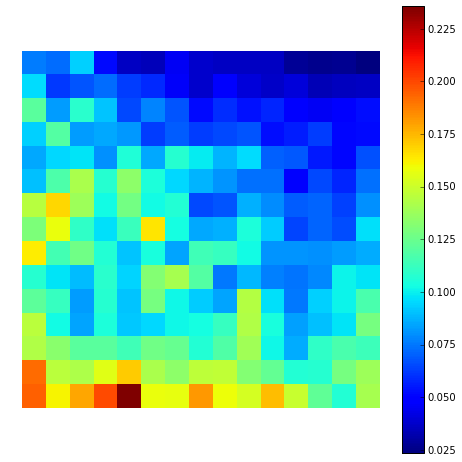

In [25]:
M.plot_map()

In [30]:
#We can evaluate other column, for example column 0 from X
M.evaluate_map(inputY=Data_X[:,0])

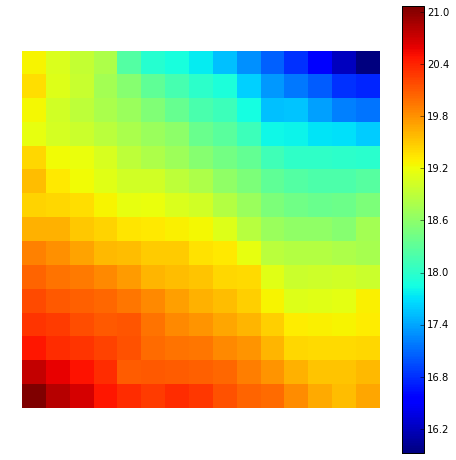

In [31]:
M.plot_map()

In [32]:
#Every time the map is created it will be different given the random weights
M.create_map()

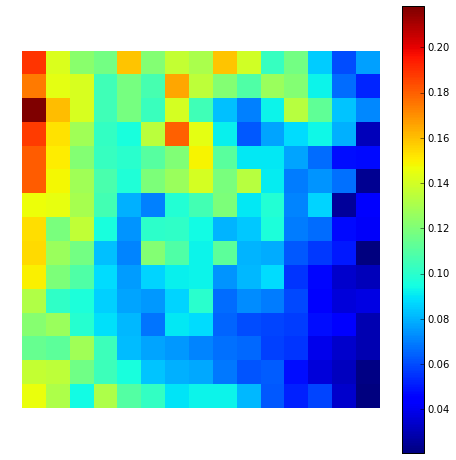

In [33]:
M.evaluate_map()
M.plot_map()

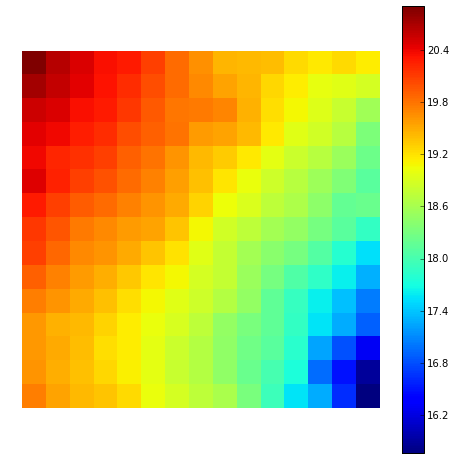

In [35]:
M.evaluate_map(inputY=Data_X[:,0])
M.plot_map()

In [41]:
#Spherical coordinates
M_sph=SOMZ.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=100)

In [45]:
M_sph.create_map()

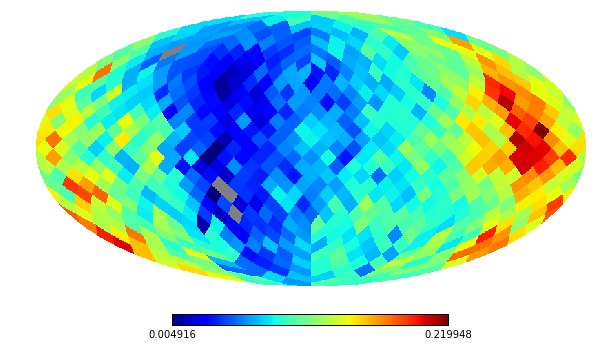

In [46]:
M_sph.evaluate_map()
M_sph.plot_map()


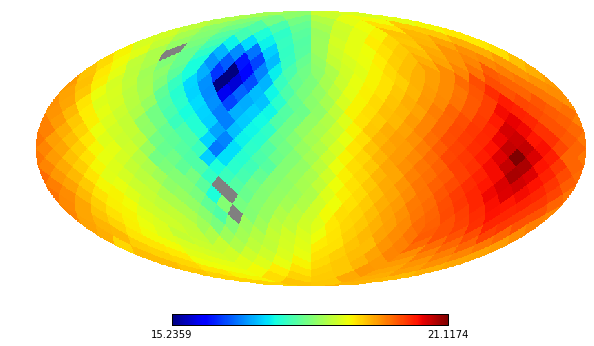

In [49]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()

## Test with fixed weights and fixed order of data presented

In [6]:
# To test with fixed weights, so answer is always the same (to be able to compare)
# need more iterations to make sure it converges
M=SOMZ.SelfMap(Data_X, Data_Y,topology='grid', Ntop=15, iterations=300, periodic='no')
print M.nDim, 'dimensions' #dimensions
print M.npix, 'cells' #cells

9 dimensions
225 cells


In [7]:
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M.nDim*M.npix).reshape(M.nDim,M.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print 'dw = ', W[0][1]-W[0][0]
np.shape(W)

dw =  0.0098814229249


(9, 225)

In [8]:
M.create_map(inputs_weights=W, random_order=False)

In [9]:
M.evaluate_map()

/Users/Matias/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook.py:122: MatplotlibDeprecationWarning: The matplotlib.mpl module was deprecated in version 1.3. Use `import matplotlib as mpl` instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


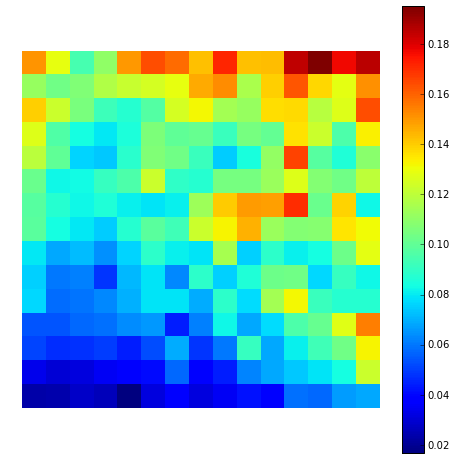

In [10]:
M.plot_map()

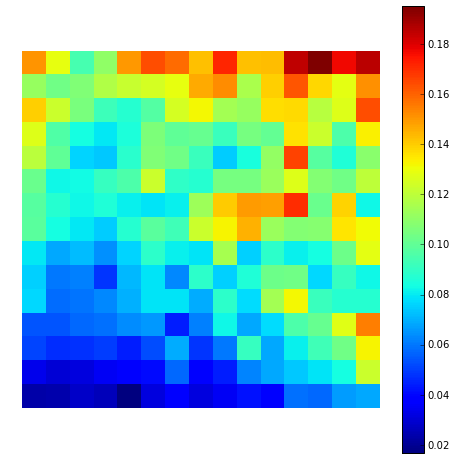

In [12]:
# If I create the map again, results should be the same
M.create_map(inputs_weights=W, random_order=False)
M.evaluate_map()
M.plot_map()

In [16]:
# To compare, we can use the resulting weights for cell 0
M.weights[:,0]

array([ 16.1580654 ,  14.33966559,  13.50589005,  13.13014191,
        12.84625795,   1.81839981,   0.83377553,   0.37574814,   0.28388396])

In [17]:
# in spherical
M_sph=SOMZ.SelfMap(Data_X, Data_Y,topology='sphere', Ntop=8, iterations=300)

In [19]:
#weights, the number of pixels is different
#weights are supposed to be random, but we can make them linear for testing
W = np.linspace(0,20,M_sph.nDim*M_sph.npix).reshape(M_sph.nDim,M_sph.npix)
#look carefully onhow this was created, elements go from 0 to 20 with a difference of 
#W[0][1]-W[0][0] = 0.009881422924901186
print 'dw = ', W[0][1]-W[0][0]
np.shape(W)


dw =  0.00289393720156


(9, 768)

In [20]:
M_sph.create_map(inputs_weights=W, random_order=False)

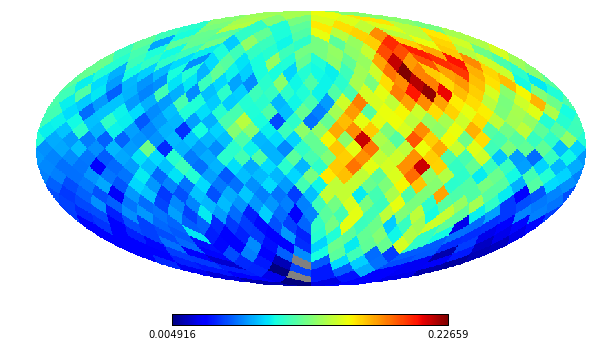

In [22]:
M_sph.evaluate_map()
M_sph.plot_map()

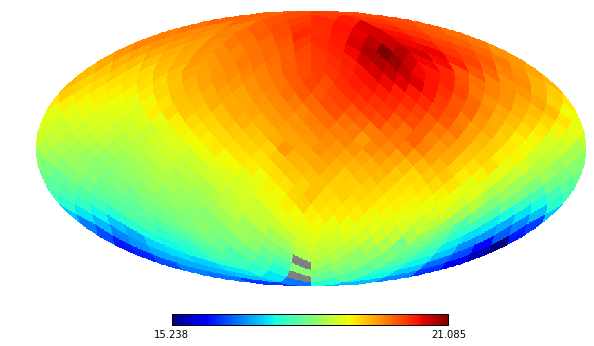

In [23]:
M_sph.evaluate_map(inputY=Data_X[:,0])
M_sph.plot_map()


In [24]:
M_sph.create_map(inputs_weights=W, random_order=False)

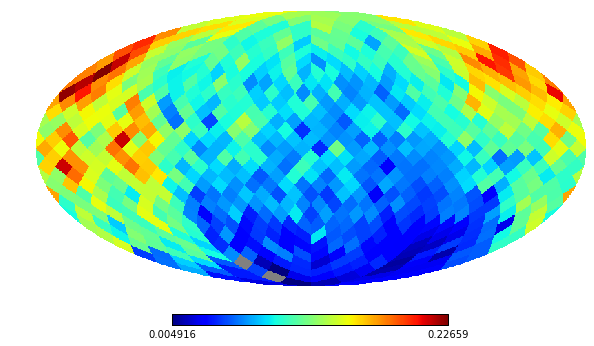

In [30]:
M_sph.evaluate_map()
M_sph.plot_map()

In [31]:
#Weights for cell 0
M_sph.weights[:,0]

array([ 20.09034726,  18.18745936,  17.18432217,  16.73921586,
        16.40915885,   1.9028879 ,   1.00313718,   0.44510632,   0.330057  ])

In [27]:
# hexagonal topology with periodic conditions
M_hex=SOMZ.SelfMap(Data_X, Data_Y,topology='hex', Ntop=15, iterations=300, periodic='yes')
print M_hex.nDim, 'dimensions' #dimensions
print M_hex.npix, 'cells' #cells

9 dimensions
270 cells


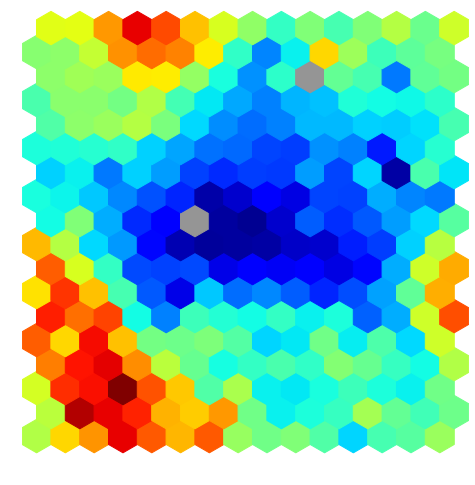

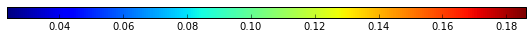

In [29]:
W=np.linspace(0,20,M_hex.nDim*M_hex.npix).reshape(M_hex.nDim,M_hex.npix)
M_hex.create_map(inputs_weights=W, random_order=False)
M_hex.evaluate_map()
M_hex.plot_map()

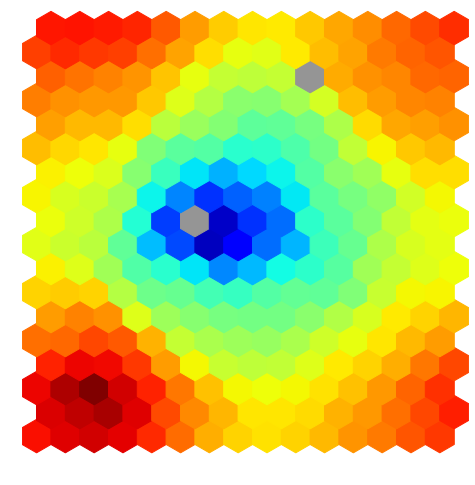

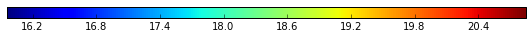

In [32]:
M_hex.evaluate_map(inputY=Data_X[:,0])
M_hex.plot_map()